In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [32]:
df = pd.read_csv('RPGF3Results.csv')

In [33]:
selected_columns = df.filter(like='OSO').merge(df[['Result: Received OP']], left_index=True, right_index=True)


In [34]:
df = selected_columns.copy()

In [35]:
df

,OSO: # GitHub Repos,OSO: Date First Commit,OSO: Total Stars,OSO: Total Forks,OSO: Total Contributors,OSO: Contributors Last 6 Months,OSO: Avg Monthly Active Devs Last 6 Months,OSO: # OP Contracts,OSO: Date First Txn,OSO: Total Onchain Users,OSO: Onchain Users Last 6 Months,OSO: Total Txns,OSO: Total Txn Fees (ETH),OSO: Txn Fees Last 6 Months (ETH),OSO: # NPM Packages,OSO: Date First Download,OSO: Total Downloads,OSO: Downloads Last 6 Months,OSO: Has Profile,Result: Received OP
0,275.0,2013-12-19,43809.0,18669.0,16072.0,1356.0,45.833333,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,663853.62
1,1.0,2013-12-26,43809.0,18669.0,4961.0,354.0,1.500000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,496896.42
2,1.0,2014-01-03,21055.0,5504.0,1834.0,108.0,2.666667,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,422361.96
3,14.0,2013-03-26,2609.0,814.0,978.0,181.0,5.333333,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,339545.72
4,29.0,2016-05-03,7095.0,1714.0,1799.0,161.0,1.166667,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,2017-04-05,115250426.0,27880694.0,1,298137.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00
639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00
640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OSO: # GitHub Repos                         307 non-null    float64
 1   OSO: Date First Commit                      307 non-null    object 
 2   OSO: Total Stars                            171 non-null    float64
 3   OSO: Total Forks                            158 non-null    float64
 4   OSO: Total Contributors                     307 non-null    float64
 5   OSO: Contributors Last 6 Months             307 non-null    float64
 6   OSO: Avg Monthly Active Devs Last 6 Months  299 non-null    float64
 7   OSO: # OP Contracts                         307 non-null    float64
 8   OSO: Date First Txn                         78 non-null     object 
 9   OSO: Total Onchain Users                    307 non-null    float64
 10  OSO: Onchain U

In [37]:
df = df.fillna(0)

In [38]:
col_drop = ['OSO: Date First Commit', 'OSO: Date First Txn', 'OSO: Date First Download']
df.drop(col_drop,axis= 1, inplace=True)
df

,OSO: # GitHub Repos,OSO: Total Stars,OSO: Total Forks,OSO: Total Contributors,OSO: Contributors Last 6 Months,OSO: Avg Monthly Active Devs Last 6 Months,OSO: # OP Contracts,OSO: Total Onchain Users,OSO: Onchain Users Last 6 Months,OSO: Total Txns,OSO: Total Txn Fees (ETH),OSO: Txn Fees Last 6 Months (ETH),OSO: # NPM Packages,OSO: Total Downloads,OSO: Downloads Last 6 Months,OSO: Has Profile,Result: Received OP
0,275.0,43809.0,18669.0,16072.0,1356.0,45.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,663853.62
1,1.0,43809.0,18669.0,4961.0,354.0,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,496896.42
2,1.0,21055.0,5504.0,1834.0,108.0,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,422361.96
3,14.0,2609.0,814.0,978.0,181.0,5.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,339545.72
4,29.0,7095.0,1714.0,1799.0,161.0,1.166667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,115250426.0,27880694.0,1,298137.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
639,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
640,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
641,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00


In [39]:
corelate = df.corr()['Result: Received OP'] 
print(corelate)
spearman_cor = df.corr(method='spearman')['Result: Received OP'] # non-linear correlation
print(spearman_cor)

OSO: # GitHub Repos                           0.407510
OSO: Total Stars                              0.639821
OSO: Total Forks                              0.607319
OSO: Total Contributors                       0.624199
OSO: Contributors Last 6 Months               0.642650
OSO: Avg Monthly Active Devs Last 6 Months    0.596325
OSO: # OP Contracts                           0.058161
OSO: Total Onchain Users                      0.062699
OSO: Onchain Users Last 6 Months              0.080379
OSO: Total Txns                               0.058793
OSO: Total Txn Fees (ETH)                     0.117879
OSO: Txn Fees Last 6 Months (ETH)             0.119637
OSO: # NPM Packages                           0.208094
OSO: Total Downloads                          0.263112
OSO: Downloads Last 6 Months                  0.273064
OSO: Has Profile                              0.444448
Result: Received OP                           1.000000
Name: Result: Received OP, dtype: float64
OSO: # GitHub Repos    

In [40]:
columns_to_drop = []
for i in range(len(df.columns)):
    
    if -0.05 < corelate[i] < 0.05 or -0.05 < spearman_cor[i] < 0.05:
        print(df.columns[i], " ", corelate[i], " ", spearman_cor[i])
        columns_to_drop.append(df.columns[i])
df = df.drop(columns=columns_to_drop, axis=1)


In [41]:
columns_with_nan = df.columns[df.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: []


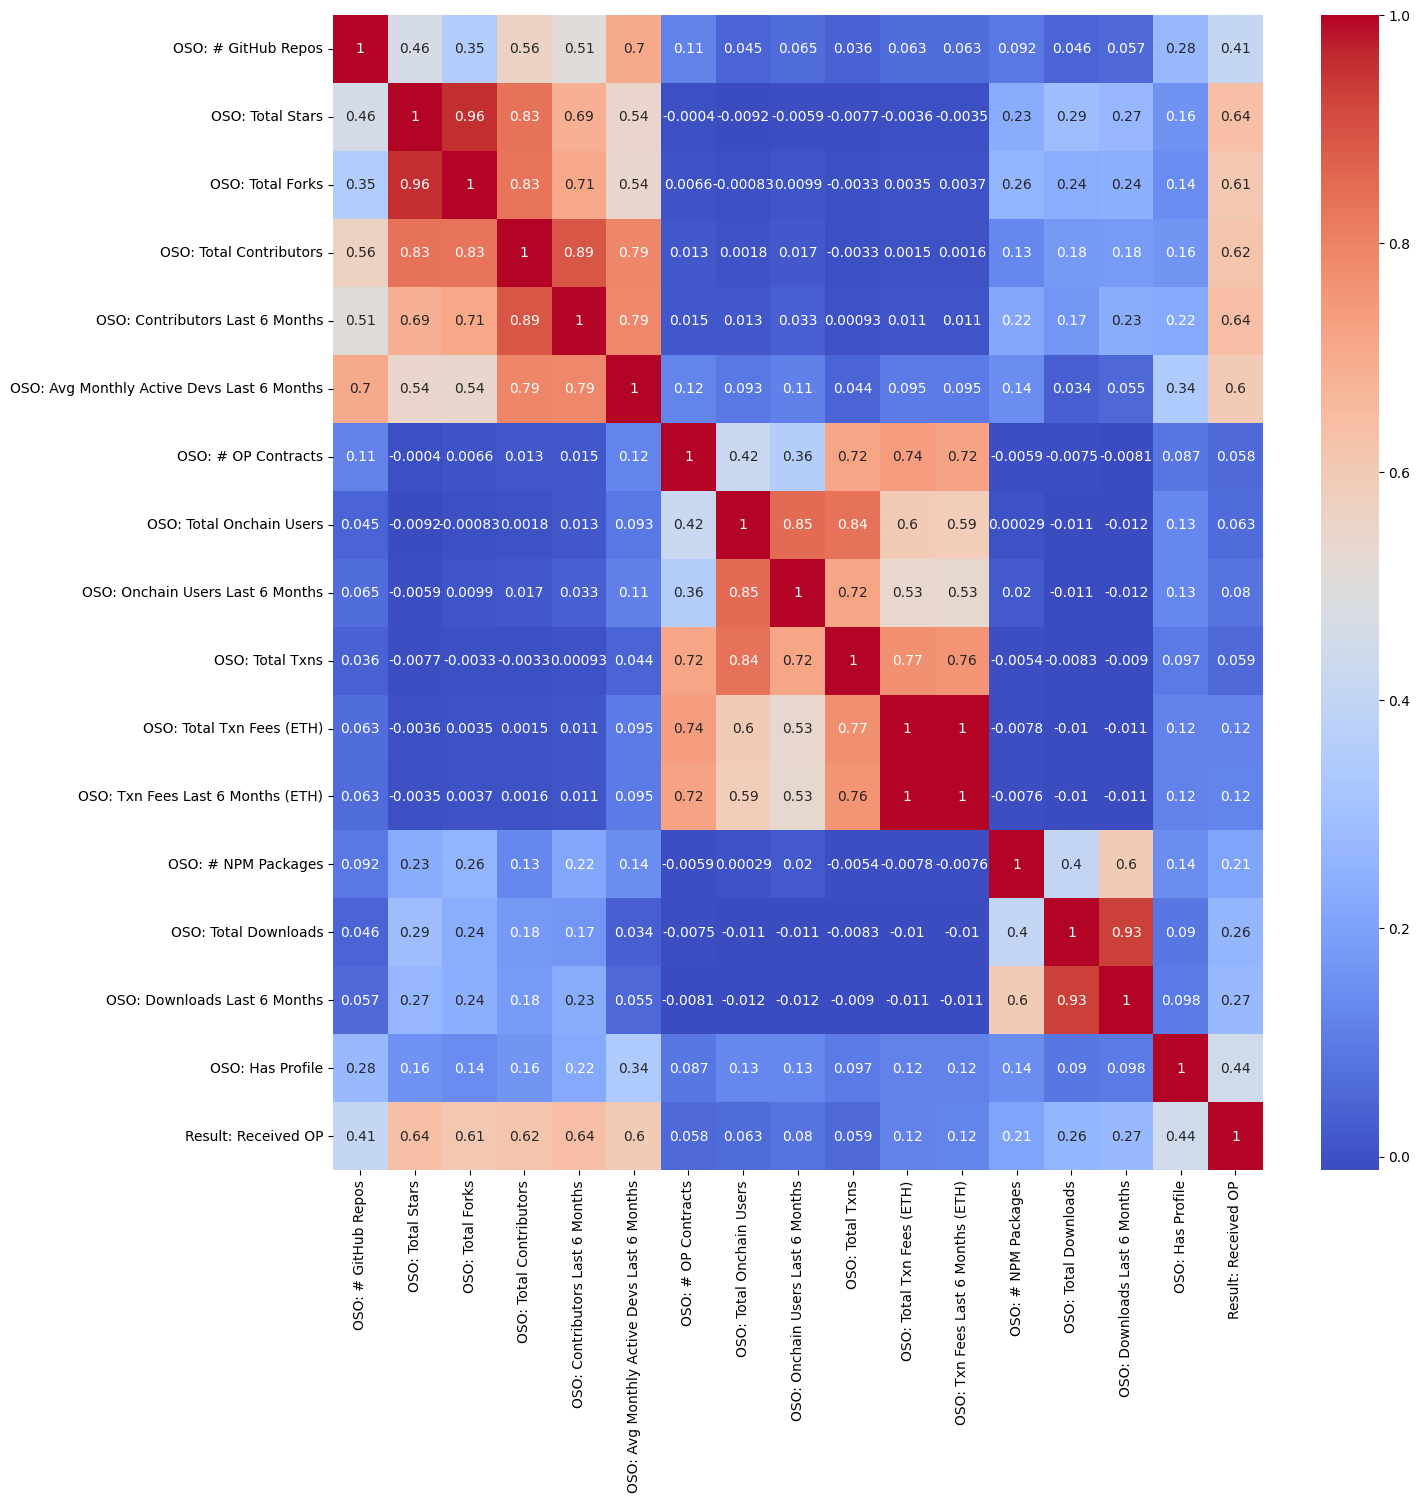

In [42]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

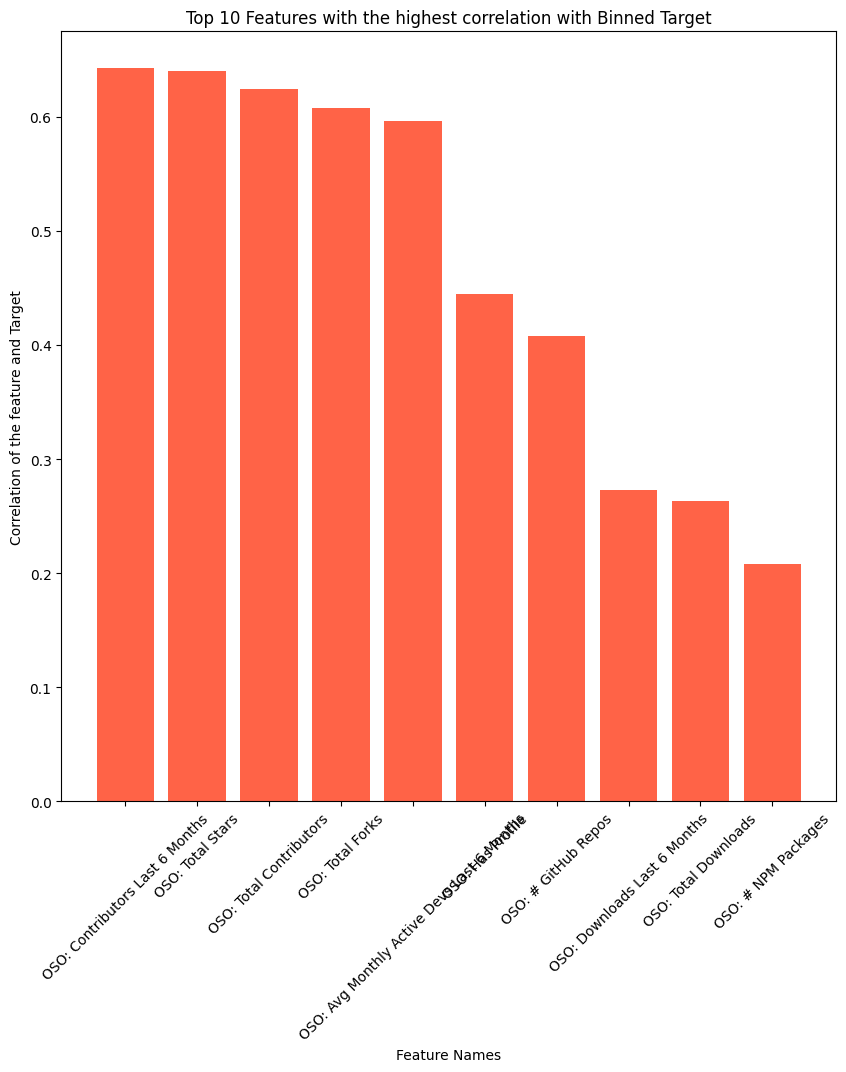

In [43]:
correlations = df.corr()['Result: Received OP'].drop('Result: Received OP')
feature = correlations.abs().nlargest(10).index
count = correlations.abs().nlargest(10).values

plt.figure(figsize=(10,10))
plt.bar(x=feature, height=count,color = 'tomato')
plt.xlabel('Feature Names')
plt.ylabel('Correlation of the feature and Target')
plt.title('Top 10 Features with the highest correlation with Binned Target')
plt.xticks(rotation = 45)
plt.show()

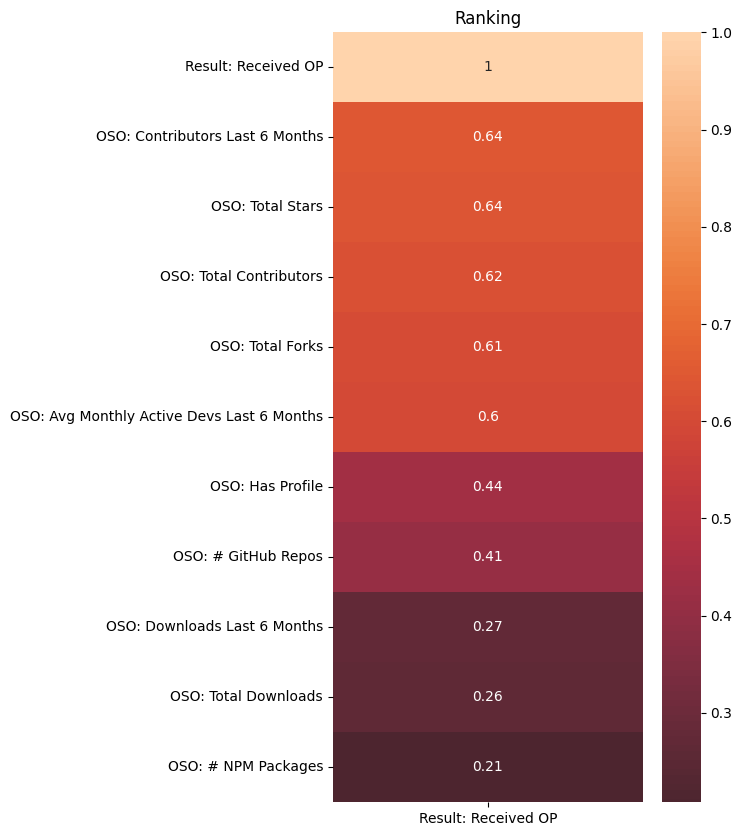

In [44]:
top_10_df = df[feature.to_list() + ['Result: Received OP']].copy()

top_10_corr = top_10_df.corr()[['Result: Received OP']]

sorted_corr = top_10_corr.sort_values(by = 'Result: Received OP', key=lambda x : abs(x), ascending=False)

plt.figure(figsize=(5,10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Ranking')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

X = df.drop('Result: Received OP', axis=1)
y = df['Result: Received OP']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [46]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [47]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -51192.809861 
DecisionTree: -56279.221669 
RandomForest: -43222.871152 
KNeighbors: -52385.404897 
XGBRegressor: -46606.960828 


In [52]:
pred = pipeline_rf.predict(X_test)

In [53]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.5486278271776652
Adjusted R^2: 0.4984753635307392
MAE: 29570.094613507652
MSE: 1736675799.395103
RMSE: 41673.44237515186


## Random Forest is the best model (for now)